In [23]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import mplfinance as mpf
import matplotlib.dates as mpl_dates
from datetime import datetime
import json
import urllib
import sys
from tradingeconomics import glob
import ssl
from urllib.request import urlopen


In [31]:
te.login() # Signup for a free API key at https://developer.tradingeconomics.com/

### Commodity Historical Performance by Init-Date and End-Date


In [28]:
def getCmtName(symbol_list):
    name_list = []
    unit_list = []
    decimals_list = []
    linkAPI = f'https://api.tradingeconomics.com/markets/commodities?c={glob.apikey}'
    response = urlopen(linkAPI)
    code = response.getcode()
    webResults = json.loads(response.read().decode('utf-8'))
    maindf = pd.DataFrame(webResults)
    for symbol in symbol_list:
        symbol_name = maindf.query(f'Symbol == "{symbol}"')
        name_list.append(symbol_name['Name'].values)
        unit_list.append(symbol_name['unit'].values)
        decimals_list.append(symbol_name['decimals'].values)
    dict_map = {
            "name_list": [name_list],
            "unit_list": [unit_list],
            "decimals_list": [decimals_list]
            }
    return dict_map
    
def getCmtHistoricalPlot(symbol_list, initDate, endDate):
    for symbol in symbol_list:
        dt = te.fetchMarkets(symbol= symbol, initDate=initDate, endDate=endDate, output_type='df')
        
        dict_map = getCmtName(symbol_list)
        
        fig, ax = plt.subplots(figsize =(15,10))
        ax.set(title = f'{dict_map["name_list"][0][0]} Historical Performance {initDate} - {endDate}') 
        plt.style.use('Solarize_Light2')
        ax.plot(dt['Close'], label=dict_map['unit_list'][0][0])
        legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
        legend.get_frame().set_facecolor('C0')
        plt.show()

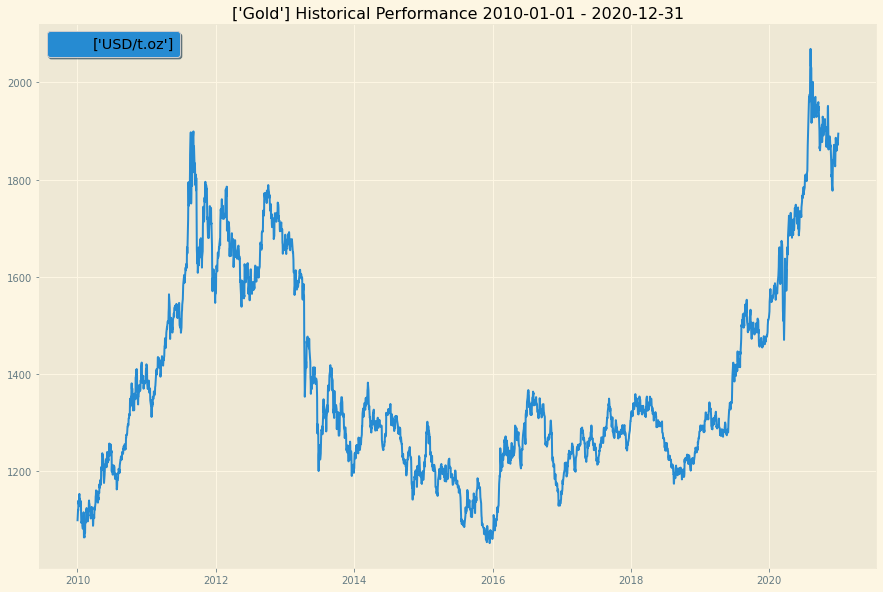

In [29]:
symbol_list = ['XAUUSD:CUR']
initDate = '2010-01-01'
endDate = '2020-12-31'
getCmtHistoricalPlot(symbol_list , initDate, endDate)